### Importing the basic Libraries

In [2]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv(r'C:\Users\DELL\Downloads\Data file.csv')
df.head() ### Checking the dataset 

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


### There are some columns which has no relation with the target like-Unnamed: 0 and msisdn. So, I will drop these two column now and proceed further.

In [4]:
df.drop(columns=['Unnamed: 0','msisdn'], inplace=True)

In [5]:
df.shape

(209593, 35)

### Most of the column has more than 5-6 digits after the decimal. So, I will round of the column's values. 

In [6]:
df=df.round(2)

In [7]:
### I think Pcircle has same value for all the labels. Let's check.
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [8]:
###The pcircle has same value. So, I will drop the column and proceed further.
df.drop(columns='pcircle', inplace=True)

In [9]:
### Checking if any miss entry or blank entry in the dataset
df.isin([" "]).sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

### There is no misentry or blank entry i found in the dataset

In [10]:
### Check the datatype 
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

## EDA

In [11]:
### Importing the basic visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1    183431
0     26162
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

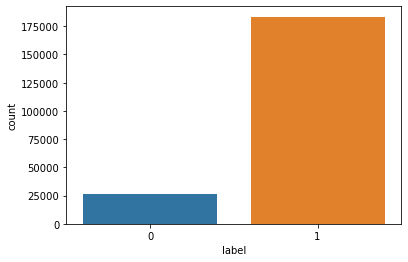

In [12]:
print(df['label'].value_counts())
sns.countplot(x='label', data=df)

### The label has unbalanced data, I will deal with this after the EDA.

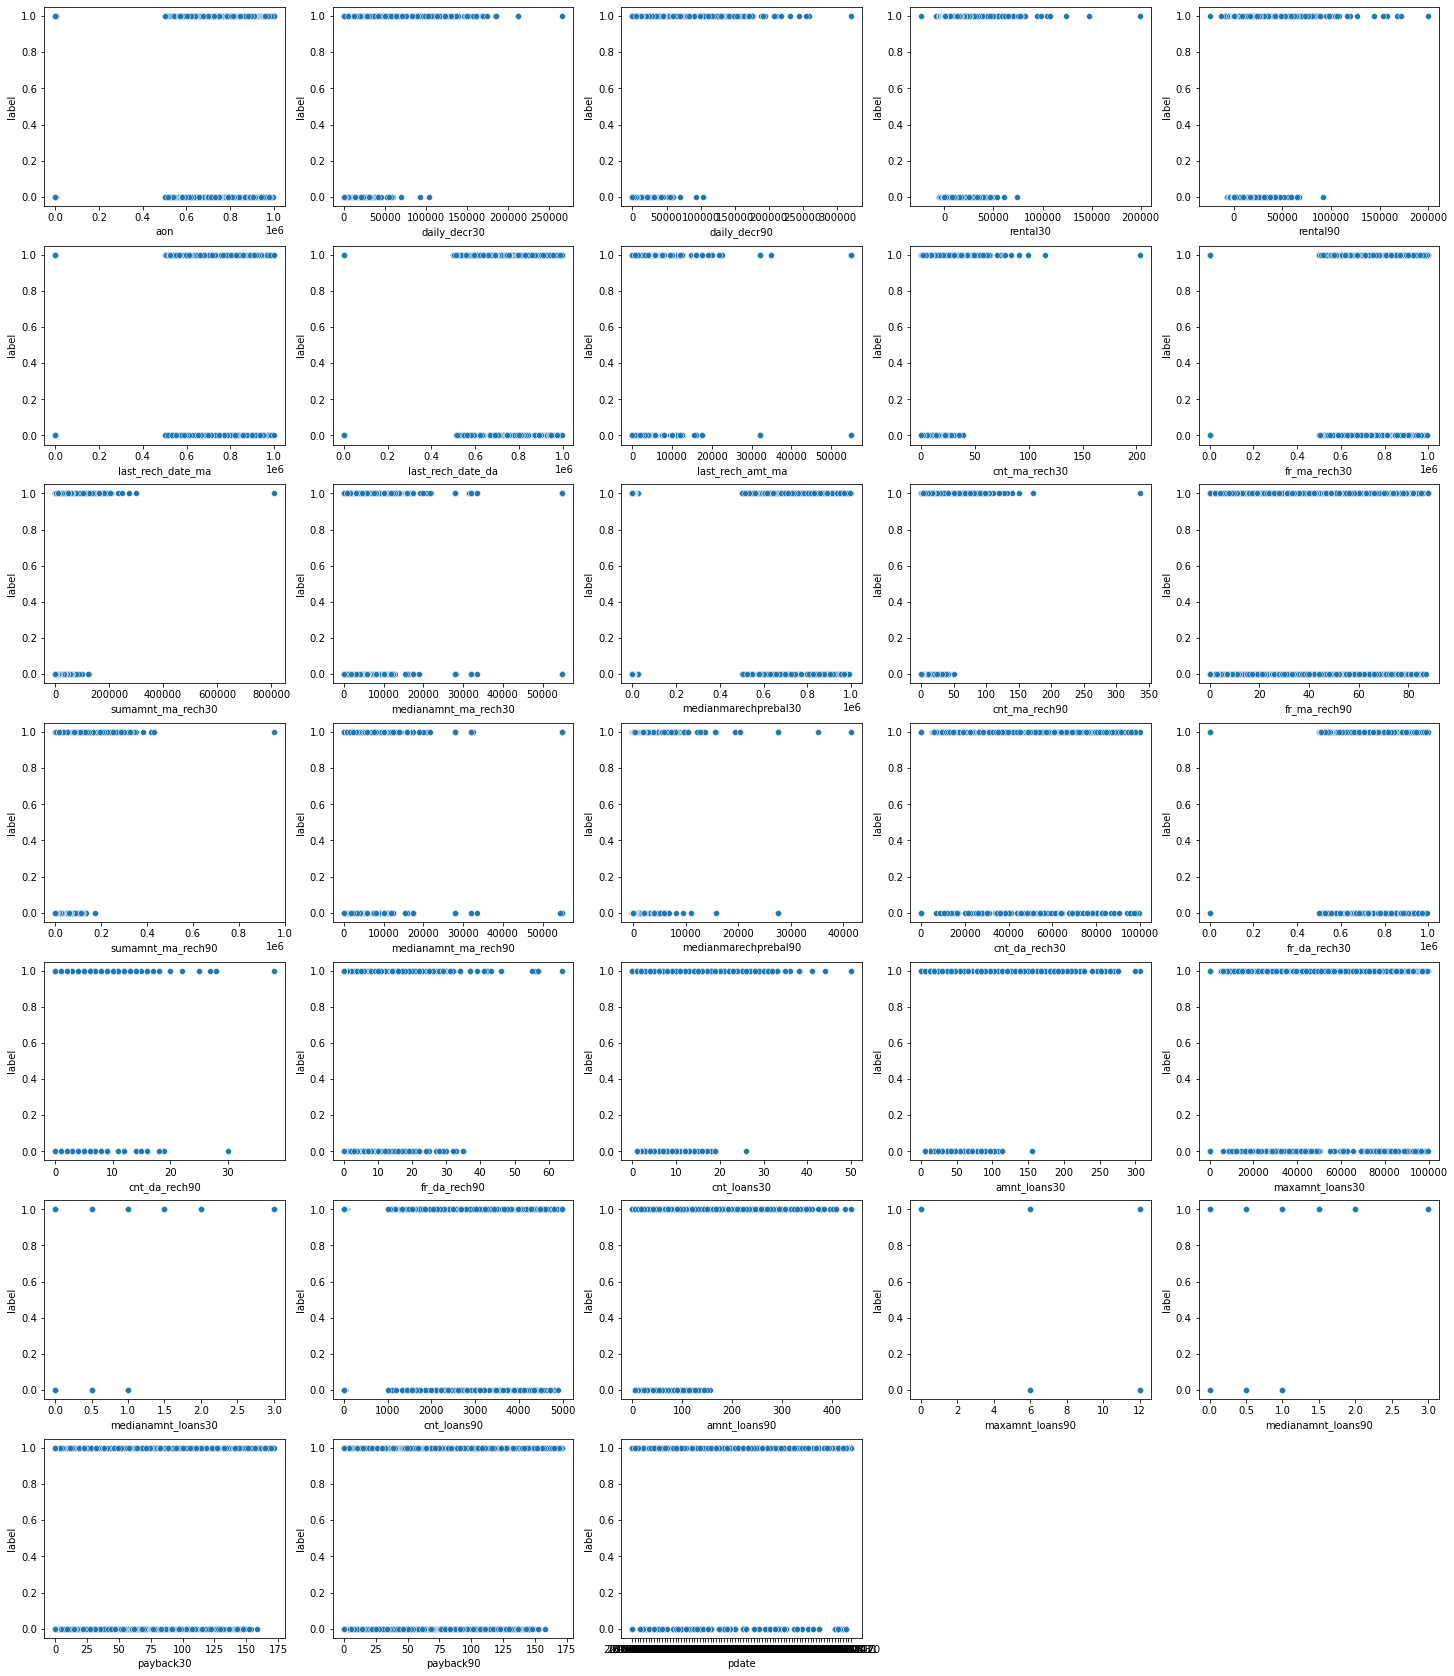

In [13]:
#### Plotting scatterplot to check the trend between features and target
x=df.drop(columns='label')
y=df['label']
plt.figure(figsize=(25,30))
pn=1
for column in x:
    if pn <=35:
        plt.subplot(7,5, pn)
        sns.scatterplot(x[column],y)
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

### Analysis with Scatter plot

#### aon- Those paid the loan, who are using network for long time.
#### daily_decr30- Those customer who used good amount daily in last 30 day has more chanceses to paid the loan.
#### daily_decr90- Those customer who used good amount daily in last 90 day has more chanceses to paid the loan.
#### rental30 - Those who has good average balance in last 30 day, has good chances to paid the loan.                
#### rental90 - Those who has good average balance in last 90 day, has good chances to paid the loan.
#### last_rech_date_ma- Those customer who rechared their main account after some time, has good chances to paid the loan
#### last_rech_date_da- Those customer who rechared their data account after some time, has good chances to paid the loan
#### last_rech_amt_ma- Customer who has recharged with good ammount, has good chances to paid the loan but with those customer who recharged with average ammount also has good chance to paid the load. 
#### cnt_ma_rech30- Those customer who recharged their main account with good number in last 30 days, has good chances to paid the loan
#### fr_ma_rech30- Those customer who recharged their main account with frequently in last 30 days, has good chances to paid the loan
#### sumamnt_ma_rech30- Those customer who recharged their main account with good amount in last 30 day, has good chances to paid the loan
#### medianamnt_ma_rech30 - Those customer who recharged their main account with good median amount in last 30 day, has good chances to paid loan
#### medianmarechprebal30- Those customer who recharged their main account before the expire of last rechange in 30 days, has good chances to paid loan
#### cnt_ma_rech90 - Those customer who recharged their main account with good number of recharge in last 90 day, has good chances to paid loan
#### fr_ma_rech90 -Those customer who recharged their main account with frequent number of recharge, has good chances to paid loan or not.
#### sumamnt_ma_rech90- Those customer who recharged their main account with avarage amount in last 90 day, has good chances to paid the loan.
#### medianamnt_ma_rech90- Those customer who recharged their main account with good median amount in last 90 day, has good chances to paid loan
#### medianmarechprebal90- Those customer who recharged their main account before the expire of last rechange in 90 days, has good chances to paid loan
#### cnt_da_rech30-Those customer who recharged their main account with good number of recharge in last 30 day, has good chances to paid loan
#### fr_da_rech30-Those customer who recharged their main account with frequent number of recharge, has good chances to paid loan or not.          
#### cnt_da_rech90- Those customer who recharged their main account with good number of recharge in last 90 day, has good chances to paid loan
#### fr_da_rech90-Those customer who recharged their main account with frequently in last 90 days, has good chances to paid the loan
#### cnt_loans30- Those customer who are taking more frequent loan in 30 days, has good chance to paid the loan.
#### amnt_loans30 - Those who borrow the large amount of loan has good probality to paid the loan.
#### maxamnt_loans30- This is categorical values so, every loan amount has both results.
#### medianamnt_loans30- This is categorical values so, every loan amount has both results.
#### payback30 -Customer are paying back or not has both results in last 30 days.
#### payback90- Customer are paying back or not has both results in last 90 days.
#### pdate- Customer are paying back or not has both result dose not more depend on the padate.

## Checking the multicolinearity. 

<function matplotlib.pyplot.show(close=None, block=None)>

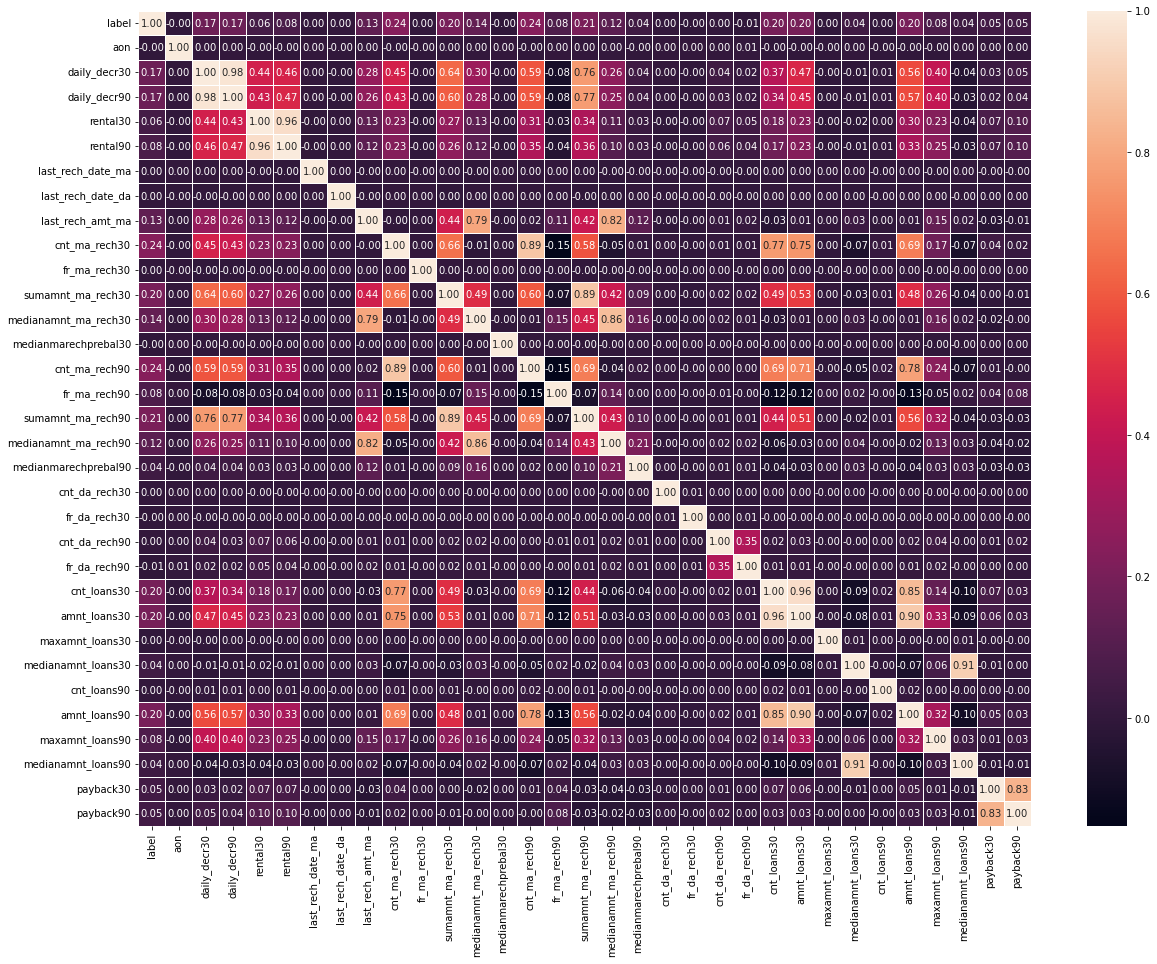

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

## Multicolinearity Analysis - 
### Lots of columns has Multicolinearity and this will mislead the accuracy of the model. So, I will drop the column which has multicolinearity more than 80% and putting the same impact to the targte whihc is Label.

#### Payback30 and Payback90 has Multicolinearity 83% and contribute on the target same.
#### medianamnt_loans30 and medianamnt_loans90 has Multicolinearity 91% and contribute on the target same.
#### amnt_loans30 and amnt_loans90 has Multicolinearity 90% and contribute on the target same.
#### amnt_loans90 and cnt_loans30 has Multicolinearity 85% and contribute on the target same.
#### amnt_loans30 and cnt_loans30 has Multicolinearity 96% and contribute on the target same.
#### cnt_ma_rech30 and cnt_ma_rech90 has Multicolinearity 89% but contribute on the target same.
#### daily_decr30 and daily_decr90 has Multicolinearity 96% and contribute on the target same.

### There are some more columns which has Multicolinearity but contribute with different percentage on target which is label. So, I will keep these column for model building.

In [15]:
### Dropping the columns which has Multicolinearity
df.drop(columns=['payback30','daily_decr30','medianamnt_loans30','cnt_loans30','amnt_loans30','cnt_ma_rech30','pdate'], inplace=True)
#df.drop(columns='pdate', inplace=True)

In [16]:
### Checking the Multicolinearity with the targat value 
df_mat=df.corr()
df_mat["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon                    -0.003785
medianmarechprebal30   -0.004829
fr_da_rech90           -0.005418
Name: label, dtype: float64

## Target (Label) has maximum relation with cnt_ma_rech90 and minimum fr_da_rech90. 

## Checking the values distribution with density plot.

<function matplotlib.pyplot.show(close=None, block=None)>

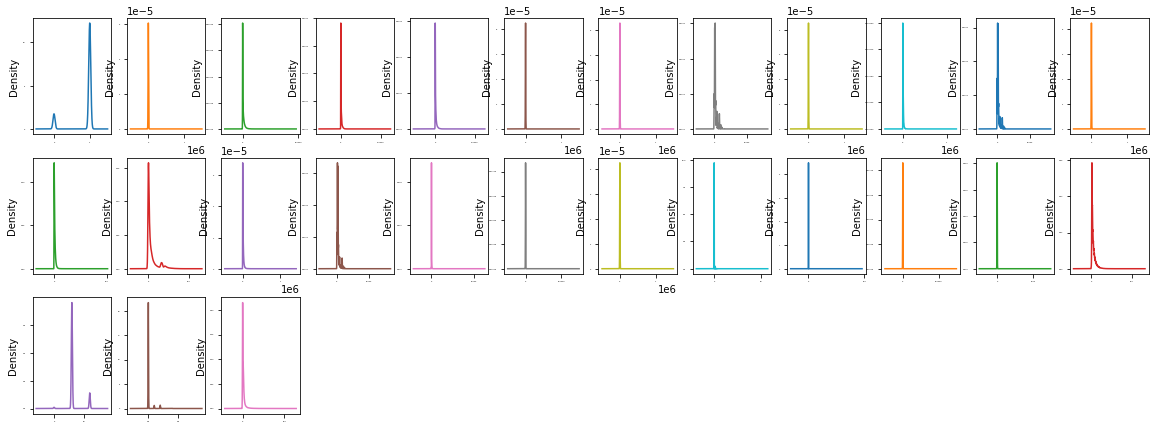

In [17]:
df.plot(kind='density', subplots=True, figsize=(20,15), layout = (6,12), fontsize =2, sharex=False, legend= False)
plt.show

### All the columns has good value distribution but some feature has skewness, some of left skewed and some of right skewed. I will again check this with skew funtion will take revalent action.

### Checking the skewness

In [18]:
x=df.drop(columns='label')
x.skew()

aon                     10.392949
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
maxamnt_loans30         17.658052
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback90                6.899951
dtype: float64

### It seems like all the columns has skewness but i will not remove any skewness as these seems to be exception because all the column has skewness.

## Cheking the outliers

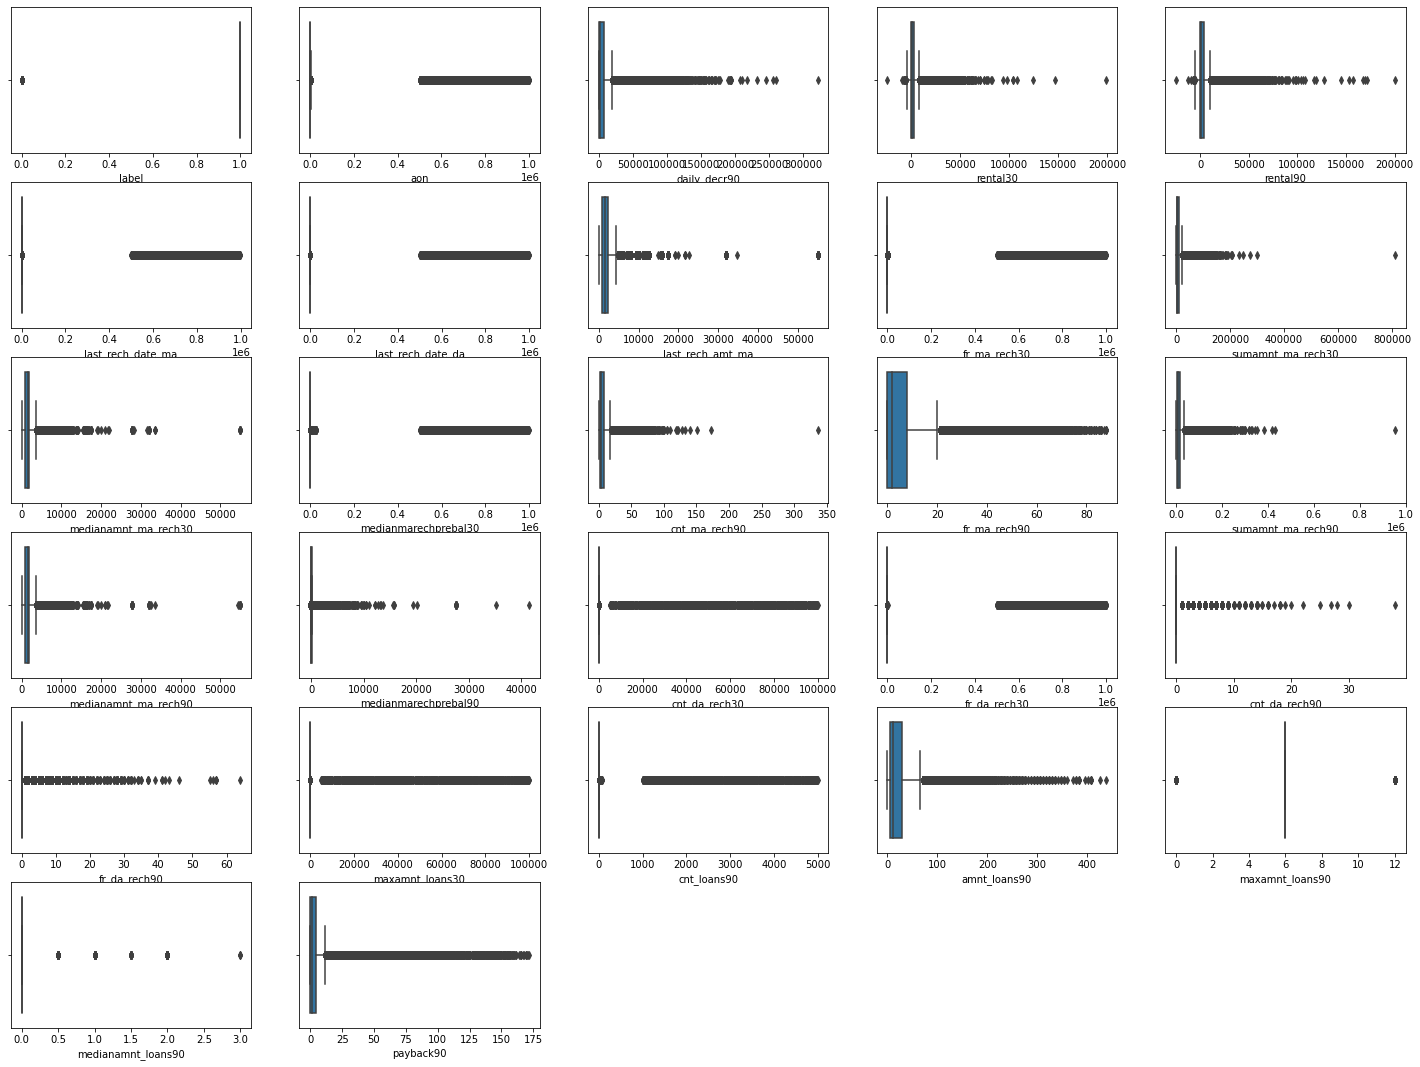

In [19]:
plt.figure(figsize=(25,22))
pn = 1
for column in df:
    if pn <= 35:
        ax = plt.subplot(7,5, pn)
        sns.boxplot(df[column], orient='h')
        plt.xlabel(column, fontsize=10)
    pn+=1
plt.show()

### All feature has outliers expect label. I will try to deal with the outliers with z-score and let see, how much data I can save.

In [20]:
df.shape

(209593, 27)

In [21]:
## Importing the z-score and apply to the data set.
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold =5
np.where(z<5)

(array([     0,      0,      0, ..., 209592, 209592, 209592], dtype=int64),
 array([ 0,  1,  2, ..., 24, 25, 26], dtype=int64))

In [22]:
df_new = df[(z<5).all(axis=1)]
df_new.shape

(191737, 27)

In [23]:
### I tried to remove minimum outliers, let check how much data I have lost in removing the outliers
### Dataloss
data_loss= (209593-191737)/209593*100
print("Data loss of the dataset", data_loss)

Data loss of the dataset 8.519368490359888


### As seen before that the target is data imbalanced. Now I am going to balanced the data with the randomsampling.

1    183431
0     26162
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

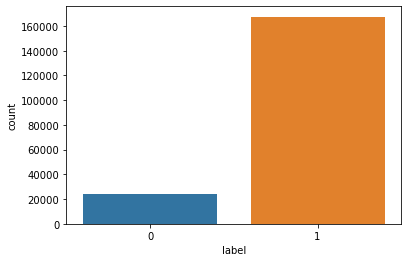

In [24]:
print(df['label'].value_counts())
sns.countplot(x='label', data=df_new)

0    167484
1    167484
Name: label, dtype: int64


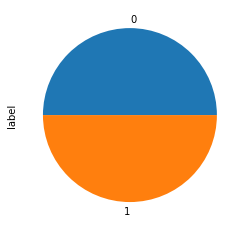

In [25]:
### Importing the RandomoverSampler
x=df_new.drop(columns='label')
y=df_new['label']
from imblearn.over_sampling import RandomOverSampler
rus=  RandomOverSampler(random_state=37)
x_sam,y_sam=rus.fit_resample(x,y)
print(y_sam.value_counts())
ax=y_sam.value_counts().plot.pie()

### Now the data seems to be blananced and will use this feature and target in the model building. Now moving forward to the model building.

In [26]:
### Importing some preprocesing library for model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
### Scaling then feature with standard scaler 
sc = StandardScaler()
x_scaled= sc.fit_transform(x_sam)

In [28]:
#### Splitting the dataset into traing data and testing data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_sam, test_size=0.20, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

267974 267974 66994 66994


In [29]:
### Importing the model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


 LogisticRegression Model Accuracy  
Accuracy_score for LogisticRegression model 76.34415022240798 
 Cross Validation score is  75.27345929640497 
 Classification report is  
               precision    recall  f1-score   support

           0       0.75      0.80      0.77     33567
           1       0.78      0.72      0.75     33427

    accuracy                           0.76     66994
   macro avg       0.76      0.76      0.76     66994
weighted avg       0.76      0.76      0.76     66994
 
 Confusion Metrix is 



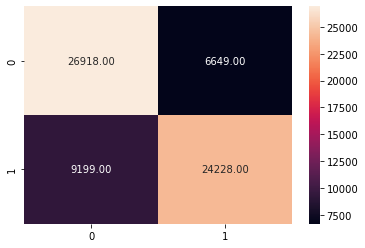

In [30]:
### Importing the LogisticRegression and checking the score and cross validation score 
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
acc_lr =accuracy_score(y_test,pred_lr)
scr = cross_val_score(lr, x_sam,y_sam, cv=5)
Clas_r = classification_report(y_test,pred_lr)
sns.heatmap(confusion_matrix(y_test,pred_lr), annot=True, fmt=".2f")
Corss_lr = scr.mean()

print("\n LogisticRegression Model Accuracy ",  '\nAccuracy_score for LogisticRegression model', acc_lr*100, "\n Cross Validation score is ",Corss_lr*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n')


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 97.94907006597606 
 Cross Validation score is  97.91502482829011 
 Classification report is  
               precision    recall  f1-score   support

           0       0.75      0.80      0.77     33567
           1       0.78      0.72      0.75     33427

    accuracy                           0.76     66994
   macro avg       0.76      0.76      0.76     66994
weighted avg       0.76      0.76      0.76     66994
 
 Confusion Metrix is 



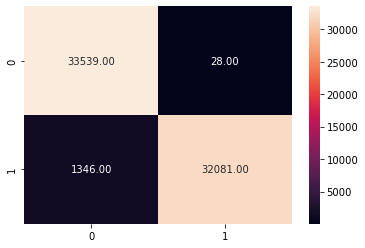

In [31]:
### Importing the RandomForestClassifier and  checking the score and cross validation score  
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
acc_RFC =accuracy_score(y_test,pred_RFC)
scr = cross_val_score(RFC, x_sam,y_sam, cv=5)
Corss_rfc = scr.mean()
sns.heatmap(confusion_matrix(y_test,pred_RFC), annot=True, fmt=".2f")
con = confusion_matrix(y_test,pred_RFC)

print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_RFC*100, "\n Cross Validation score is ",Corss_rfc*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n')


 GaussianNB Model Accuracy 

Accuracy_score for GaussianNB model 69.81968534495626 
 Cross Validation score is  69.55022649725319 
 Classification report is  
               precision    recall  f1-score   support

           0       0.65      0.87      0.74     33567
           1       0.81      0.52      0.63     33427

    accuracy                           0.70     66994
   macro avg       0.73      0.70      0.69     66994
weighted avg       0.73      0.70      0.69     66994
 
 Confusion Metrix is 



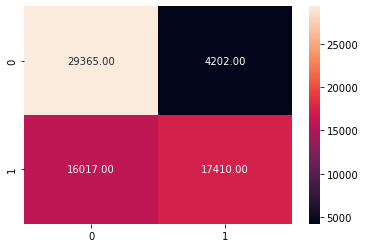

In [32]:
### Importing the GaussianNB and checking the score and cross validation score  
GB= GaussianNB()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
acc_GB =accuracy_score(y_test,pred_GB)
scr = cross_val_score(GB, x_sam,y_sam, cv=5)
Corss_GB = scr.mean()
Clas_r = classification_report(y_test,pred_GB)
sns.heatmap(confusion_matrix(y_test,pred_GB), annot=True, fmt=".2f")

print("\n GaussianNB Model Accuracy",  '\n\nAccuracy_score for GaussianNB model', acc_GB*100, "\n Cross Validation score is ",Corss_GB*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n')


 GradientBoostingClassifier Model Accuracy 

Accuracy_score for GradientBoostingClassifier model 80.14896856434905 
 Cross Validation score is  80.45156636117949 
 Classification report is  
               precision    recall  f1-score   support

           0       0.65      0.87      0.74     33567
           1       0.81      0.52      0.63     33427

    accuracy                           0.70     66994
   macro avg       0.73      0.70      0.69     66994
weighted avg       0.73      0.70      0.69     66994
 
 Confusion Metrix is 



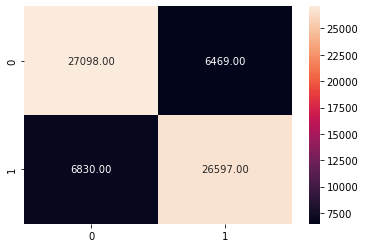

In [33]:
### Importing the GradientBoostingClassifier and checking the score and cross validation score
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
acc_gbc =accuracy_score(y_test,pred_gbc)
scr = cross_val_score(gbc, x_sam,y_sam, cv=5)
Corss = scr.mean()
sns.heatmap(confusion_matrix(y_test,pred_gbc), annot=True, fmt=".2f")
con = confusion_matrix(y_test,pred_gbc)
print("\n GradientBoostingClassifier Model Accuracy",  '\n\nAccuracy_score for GradientBoostingClassifier model', acc_gbc*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n')


 KNeighborsClassifier Model Accuracy 

Accuracy_score for KNeighborsClassifier model 87.28692121682539 
 Cross Validation score is  87.48477522050713 
 Classification report is  
               precision    recall  f1-score   support

           0       0.81      0.98      0.88     33567
           1       0.97      0.77      0.86     33427

    accuracy                           0.87     66994
   macro avg       0.89      0.87      0.87     66994
weighted avg       0.89      0.87      0.87     66994
 
 Confusion Metrix is 



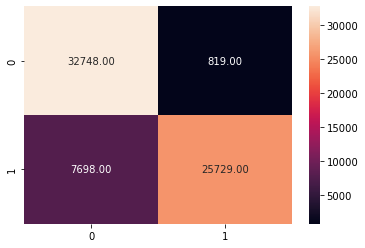

In [35]:
### Importing the KNeighborsClassifier and checking the score and cross validation score 
KNC= KNeighborsClassifier()
KNC.fit(x_train,y_train)


pred_KNC=KNC.predict(x_test)
acc_KNC =accuracy_score(y_test,pred_KNC)
scr = cross_val_score(KNC, x_sam,y_sam, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_KNC)
sns.heatmap(confusion_matrix(y_test,pred_KNC), annot=True, fmt=".2f")
print("\n KNeighborsClassifier Model Accuracy",  '\n\nAccuracy_score for KNeighborsClassifier model', acc_KNC*100, "\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n')

### I performed 5 model prediction Accuracy score, those score are mentioned below - 


#### Accuracy score and cross validation score for LogisticRegression model 76.34  and cross validation score is 75.27 
#### Accuracy score cross validation score for RandomForestClassifier model 97.94 and cross validation score is 97.94 
#### Accuracy score cross validation score for GaussianNB model 69.81968534495626 and cross validation score is 69.55
#### Accuracy score cross validation score for KNeighborsClassifier model 87.28  and cross validation score is 87.48
#### Accuracy score cross validation score  for GradientBoostingClassifier model 80.14 and cross validation score is 80.45

### From the above, I conclude that I will go forward with RandomForestClassifier because the accuracy is good compariosn to other model and aslo has very low difference in Cross validation score. As the RandomForestClassifier is performing pretty good. I do not need to perform any hyperparameter tunning. 


### ROC- AUC Curve

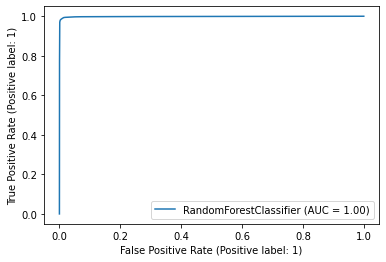

In [42]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve( RFC,x_test,y_test)
plt.show()

### ROC curve is 100% and score is pretty good.

### Saving the model

In [44]:
import joblib
joblib.dump(RFC, 'Micro Credit Project')

['Micro Credit Project']